<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/filter_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,SelectFpr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv("/content/wine_dataset.csv")

In [3]:
X_col =  df.drop(['style'], axis=1)
y = LabelEncoder().fit_transform(df['style'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)

CHI Square Method

In [5]:
test = SelectKBest(score_func=chi2, k=len(X.columns)).fit(X,y)
np.set_printoptions(precision=3)
score  =  test.scores_

In [6]:
Y = X.columns

Text(0, 0.5, 'Features name')

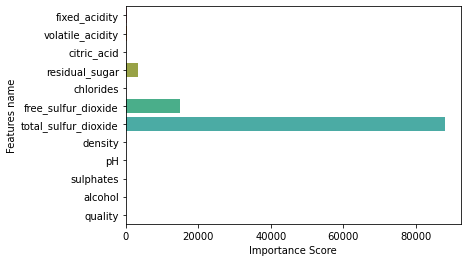

In [7]:
sns.barplot(x  = score,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

ANOVA using SVM

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

anova_filter = SelectKBest(f_classif, k=len(X.columns))
clf = LinearSVC()
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('selectkbest', SelectKBest(k=12)), ('linearsvc', LinearSVC())])

In [9]:
from sklearn.metrics import classification_report

y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       311
           1       1.00      0.96      0.98       989

    accuracy                           0.96      1300
   macro avg       0.94      0.97      0.95      1300
weighted avg       0.97      0.96      0.97      1300



In [10]:
ranks = anova_svm[-1].coef_.reshape(-1)

Text(0, 0.5, 'Features name')

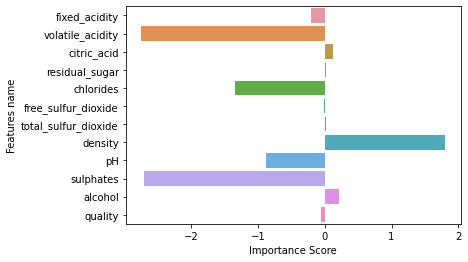

In [11]:
sns.barplot(x  = ranks,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

ANOVA using Logistic Regression

In [12]:
anova_filter = SelectKBest(f_classif, k=len(X.columns))
linear_clasifier =  LogisticRegression()
anova_lr = make_pipeline(anova_filter, linear_clasifier)
anova_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('selectkbest', SelectKBest(k=12)),
                ('logisticregression', LogisticRegression())])

In [13]:
y_pred = anova_lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       311
           1       0.99      0.99      0.99       989

    accuracy                           0.98      1300
   macro avg       0.97      0.98      0.97      1300
weighted avg       0.98      0.98      0.98      1300



In [14]:
ranks = anova_lr[-1].coef_.reshape(-1)

Text(0, 0.5, 'Features name')

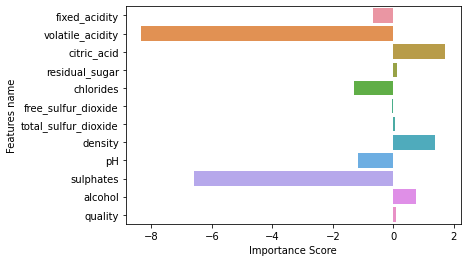

In [15]:
sns.barplot(x  = ranks,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

Tree based models

In [16]:
from sklearn.ensemble import RandomForestRegressor


In [17]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

In [18]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [19]:
rf.feature_importances_

array([0.017, 0.033, 0.003, 0.008, 0.362, 0.002, 0.517, 0.024, 0.012,
       0.014, 0.006, 0.001])

Text(0.5, 0, 'Feature Importance')

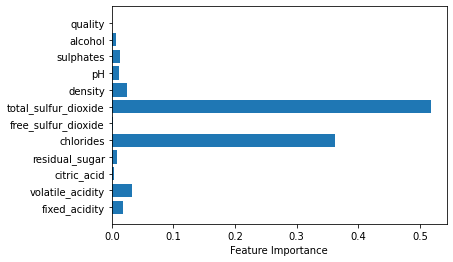

In [20]:
sort = rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

Feature importance using permutation importance of SCikit learn this method can be used in any model.

In [21]:
from sklearn.inspection import permutation_importance

In [22]:
clf = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [23]:
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)

Text(0.5, 0, 'Feature Importance MEAN')

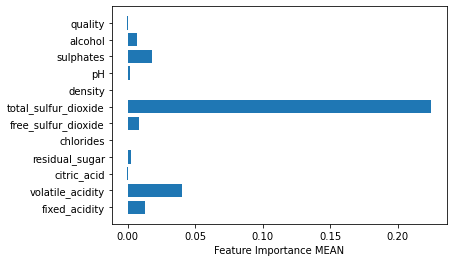

In [24]:
plt.barh(X.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

Text(0.5, 0, 'Feature Importance STD')

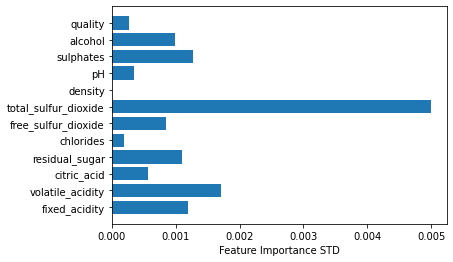

In [25]:
plt.barh(X.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

Feature importane using PCA 

In [26]:
from sklearn.decomposition import PCA

In [32]:
Scaler =  StandardScaler()
df_scaled =  Scaler.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=0)

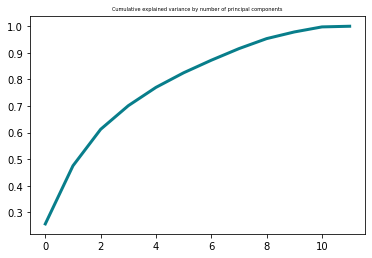

In [35]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [39]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_col.columns) + 1)],
    index=X_col.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
fixed_acidity,-0.429527,0.441015,0.586923,-0.153369,-0.160715,0.024520,-0.294142,-0.093663,-0.274585,0.142065,-0.137490,0.057350
volatile_acidity,-0.688445,0.185438,-0.371258,-0.080136,-0.111260,0.357786,-0.279865,-0.216677,0.139998,-0.262745,0.071007,0.013776
citric_acid,0.270564,0.236857,0.749245,0.049137,0.210859,-0.277070,-0.029498,-0.303762,0.213628,-0.176580,0.111122,-0.000028
residual_sugar,0.563251,0.515761,-0.103204,0.106863,-0.451469,0.050947,0.087243,-0.003404,0.345961,0.128966,-0.006180,0.074714
chlorides,-0.525155,0.468333,0.051824,0.181789,0.381217,0.301027,0.416277,-0.200731,0.048081,0.118642,-0.095607,0.007269


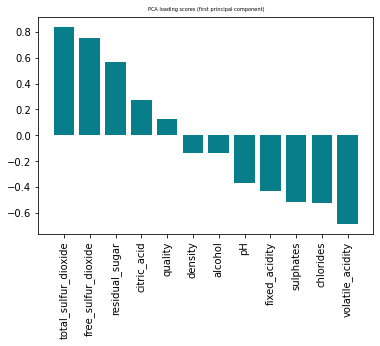

In [41]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

F score method

In [43]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X_col.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X_col.columns)]
fs_indices_fscore

array([ 6,  1,  4,  0,  9,  5,  7,  3,  8,  2, 11, 10])

In [44]:
best_features_fscore = df.columns[fs_indices_fscore].values
best_features_fscore

array(['total_sulfur_dioxide', 'volatile_acidity', 'chlorides',
       'fixed_acidity', 'sulphates', 'free_sulfur_dioxide', 'density',
       'residual_sugar', 'pH', 'citric_acid', 'quality', 'alcohol'],
      dtype=object)

In [45]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([5.044e+03, 3.869e+03, 1.788e+03, 1.650e+03, 1.583e+03, 1.505e+03,
       9.794e+02, 7.273e+02, 6.205e+02, 1.932e+02, 6.948e+01, 3.352e+00])

Text(0, 0.5, 'Features')

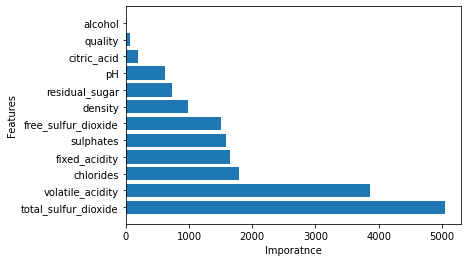

In [48]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

Mutual Information (Entropy based method)

In [50]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X_col.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X_col.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['chlorides', 'total_sulfur_dioxide', 'volatile_acidity',
       'residual_sugar', 'free_sulfur_dioxide', 'sulphates', 'density',
       'fixed_acidity', 'citric_acid', 'pH', 'alcohol', 'quality'],
      dtype=object)

In [51]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.355, 0.347, 0.241, 0.212, 0.165, 0.152, 0.138, 0.133, 0.098,
       0.07 , 0.023, 0.007])

Text(0, 0.5, 'Features')

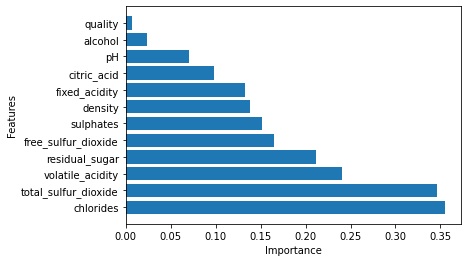

In [53]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

Pearson Correlation

In [53]:
df['style'] = LabelEncoder().fit_transform(df['style'])
df_corr = df.corr()

In [80]:
df_corr['style']

fixed_acidity          -0.486740
volatile_acidity       -0.653036
citric_acid             0.187397
residual_sugar          0.348821
chlorides              -0.512678
free_sulfur_dioxide     0.471644
total_sulfur_dioxide    0.700357
density                -0.390645
pH                     -0.329129
sulphates              -0.487218
alcohol                 0.032970
quality                 0.119323
style                   1.000000
Name: style, dtype: float64